# Mind Wandering
This notebook documents the mind wandering VR experiment in conjunction with biosignalsplux EEG and fNIRS sensor data.

## Experiment
The subject sees text on a plane with a gradient on the top and bottom. The gradient helps the user focus on the current line, which also has a darker font. The user reads the current line, and they click the trigger on the hand control every time they see a misspelled word. Clicking the trigger will mark whichever word the user is looking at as misspelled.

If a user misses a misspelled word, then they are not focused and we can consider that point in the experiment as mind wandering. We can then look at that timestamp within the EEG and fNIRS data for analysis.

In [32]:
import pandas as pd
import numpy as np
import json
import datetime as dt
import biosignalsnotebooks as bsnb
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from IPython.display import display

from utils.multitaper_spectogram_python import multitaper_spectrogram

In [33]:
vr_filepath = "mind-wandering-152412-questions.json"
questions_filepath = "mind-wandering-152412.csv"
plux_filepath = "reza_mind_wandering.txt"

In [34]:
#plux_filepath = "data/eyesopeneyesclosed_jack_11-15-21.txt"

with open(plux_filepath) as plux:
    header = json.loads(plux.readlines()[1][1:])
    
    key = list(header.keys())[0]
    #plux_start = header.get
    #print(json.dumps(header[key], indent=4))
    plux_date = header[key]["date"]
    plux_time = header[key]["time"]

    plux_start = dt.datetime.strptime(plux_date + " " + plux_time, "%Y-%m-%d %H:%M:%S.%f")
   

    plux_sampling_rate = header[key]["sampling rate"]
    plux_resolution = header[key]["resolution"][0]

    plux_columns = header[key]["column"]
    #print(plux_columns)

    #print(plux_sampling_rate, plux_start)

plux_raw = np.loadtxt(plux_filepath, skiprows=3)
plux_data = pd.DataFrame(plux_raw, columns=plux_columns)
plux_data["time"] = plux_data["nSeq"].apply(lambda t: plux_start + dt.timedelta(seconds=t/plux_sampling_rate))

display(plux_data)


,nSeq,DI,CH1,CH9A,CH9B,time
0,0.0,0.0,30760.0,0.0,0.0,2021-12-15 15:00:34.949
1,1.0,0.0,29304.0,0.0,0.0,2021-12-15 15:00:34.950
2,2.0,0.0,28484.0,4527.0,134380.0,2021-12-15 15:00:34.951
3,3.0,0.0,28800.0,4527.0,134380.0,2021-12-15 15:00:34.952
4,4.0,0.0,28840.0,105060.0,174547.0,2021-12-15 15:00:34.953
...,...,...,...,...,...,...
1445845,1445845.0,0.0,34930.0,97021.0,107321.0,2021-12-15 15:24:40.794
1445846,1445846.0,0.0,27624.0,96891.0,107291.0,2021-12-15 15:24:40.795
1445847,1445847.0,0.0,16112.0,96891.0,107291.0,2021-12-15 15:24:40.796
1445848,1445848.0,0.0,7238.0,97911.0,107267.0,2021-12-15 15:24:40.797


Multitaper Spectrogram Properties: 
     Spectral Resolution: 0.16666666666666666Hz
     Window Length: 60.0s
     Window Step: 5.0s
     Time Half-Bandwidth Product: 5
     Number of Tapers: 9
     Frequency Range: 2-50Hz
     Detrend: linear


 Multitaper compute time: 15.193765600000006 seconds


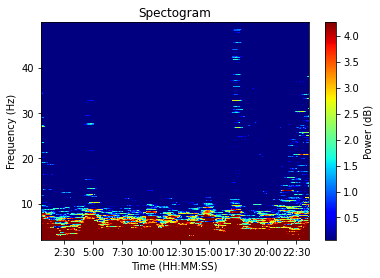

In [35]:
eeg_data = plux_data["CH1"]

eeg_uv = bsnb.raw_to_phy("EEG", "biosignalsplux", eeg_data, plux_resolution, "uV")
time_uv = bsnb.generate_time(eeg_uv, plux_sampling_rate)



plt.title("Spectogram")

spect, stimes, sfreqs = multitaper_spectrogram(eeg_uv, plux_sampling_rate, frequency_range=[2, 50], window_params=[120, 5])